<a href="https://colab.research.google.com/github/yogen-py/CTF-solves-and-Write-ups/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import vitaldb
dfcases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
dfTrack = pd.read_csv("https://api.vitaldb.net/trks")  # track list
dflabs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans


# A1. If your project deals with a regression problem, please use one attribute of your dataset (X_train) along with the target values (y_train) for training a linear regression model.

In [ ]:
X = dfcases[['weight','age']]
y = dfcases['bmi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

reg = LinearRegression().fit(X_train, y_train)

y_train_pred = reg.predict(X_train)

In [ ]:
X = dfcases[['weight']]  # This will be the predictor
y = dfcases['height']  # This will be the target
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Train the regression model
reg = LinearRegression().fit(X_train, y_train)
# Predict on the training data
y_train_pred = reg.predict(X_train)


#Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.Perform prediction on the test data and compare the metric values between train and test set.

In [ ]:
mse_train = mean_squared_error(y_train, y_train_pred)  # Calculating MSE
rmse_train = np.sqrt(mse_train)  # Calculating RMSE
r2_train = r2_score(y_train, y_train_pred)  # Calculating R^2

print(f"Training MSE: {mse_train:.2f}")
print(f"Training RMSE: {rmse_train:.2f}")
print(f"Training R²: {r2_train:.2f}")



Training MSE: 62.83
Training RMSE: 7.93
Training R²: 0.35


In [ ]:
mape_train = mean_absolute_percentage_error(y_train, y_train_pred) # Calculating MAPE for training data
print(f"Training MAPE: {mape_train:.2f}%")

Training MAPE: 0.04%


In [ ]:
y_test_pred = reg.predict(X_test)

In [ ]:
mse_test = mean_squared_error(y_test, y_test_pred) # Calculating MSE for test data
rmse_test = np.sqrt(mse_test) # Calculating RMSE for test data
r2_test = r2_score(y_test, y_test_pred) # Calculating R^2 for test data

print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R²: {r2_test:.2f}")

Test MSE: 66.05
Test RMSE: 8.13
Test R²: 0.35


In [ ]:
mape_test = mean_absolute_percentage_error(y_test, y_test_pred) # Calculating MAPE for test data
print(f"Test MAPE: {mape_test:.2f}%")

Test MAPE: 0.07%


#3. Repeat the exercises A1 and A2 with more than one attribute or all attributes

In [ ]:
X = dfcases[['weight', 'age', 'height']] # This will be predictor
y = dfcases['bmi'] # This will be Target

# Training and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)


y_train_pred = reg.predict(X_train)

y_test_pred = reg.predict(X_test)
 # Calculating MSE RMSE R^2 and MAPE for training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
r2_train = r2_score(y_train, y_train_pred)
 # Calculating MSE RMSE R^2 and MAPE for test data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
r2_test = r2_score(y_test, y_test_pred)


print(f"Training Data Metrics:\nMSE: {mse_train}\nRMSE: {rmse_train}\nMAPE: {mape_train}\nR2: {r2_train}")
print(f"Test Data Metrics:\nMSE: {mse_test}\nRMSE: {rmse_test}\nMAPE: {mape_test}\nR2: {r2_test}")


Training Data Metrics:
MSE: 0.36232658755365427
RMSE: 0.601935700514311
MAPE: 1.398006360932619
R2: 0.9724738036974386
Test Data Metrics:
MSE: 0.49604094859454495
RMSE: 0.7043017454149499
MAPE: 1.539533255367788
R2: 0.961810274616858


# Perform k-means clustering on your data.

In [ ]:
# Perform k-means clustering with a specified number of clusters
kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto').fit(X)

# Get the cluster labels
labels = kmeans.labels_


cluster_centers = kmeans.cluster_centers_


print("Cluster Labels:")
print(labels)

print("Cluster Centers:")
print(cluster_centers)


dfcases['cluster'] = labels


Cluster Labels:
[0 0 0 ... 0 1 1]
Cluster Centers:
[[ 59.73576246  66.27473345 160.45221919]
 [ 64.4804034   41.92101911 165.16282803]]


# For the clustering done in A4, calculate the: (i) Silhouette Score, (ii) CH Score and (iii) DB Index.

In [ ]:
silhouette_avg = silhouette_score(X, labels)
calinski_harabasz_avg = calinski_harabasz_score(X, labels)
davies_bouldin_avg = davies_bouldin_score(X, labels)


print("Silhouette Score:", silhouette_avg)
print("Calinski-Harabasz Score:", calinski_harabasz_avg)
print("Davies-Bouldin Index:", davies_bouldin_avg)


Silhouette Score: 0.3250413227691866
Calinski-Harabasz Score: 2994.659688081559
Davies-Bouldin Index: 1.2650706148274509


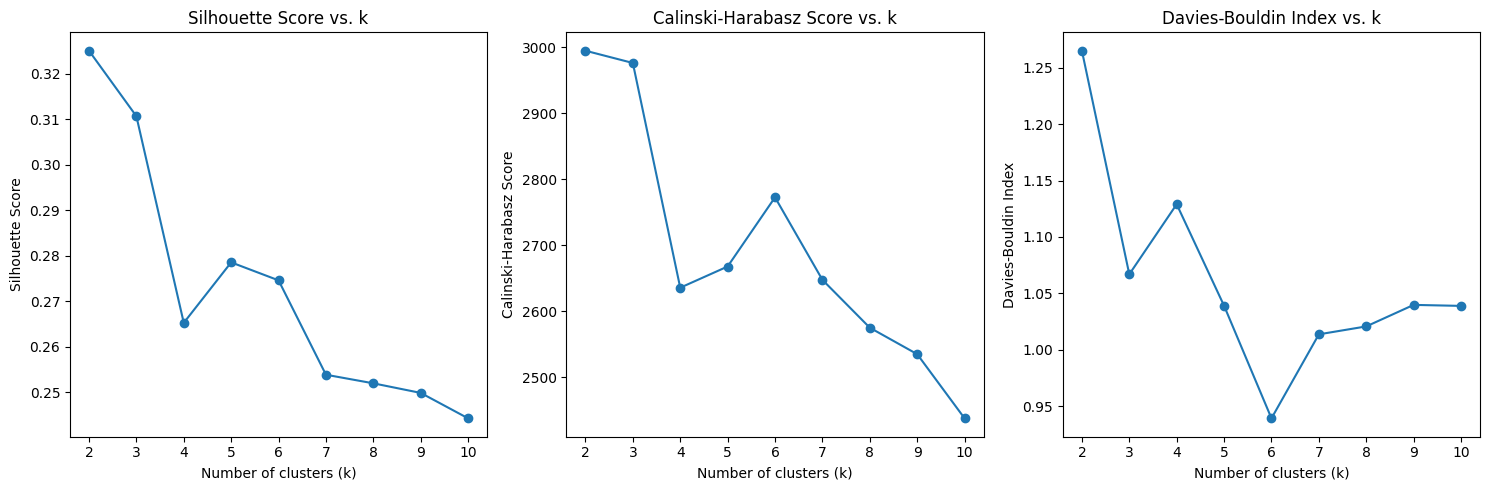

In [ ]:

k_values = range(2, 11)


silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_indices = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X)
    labels = kmeans.labels_

    silhouette_scores.append(silhouette_score(X, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))
    davies_bouldin_indices.append(davies_bouldin_score(X, labels))

plt.figure(figsize=(15, 5))

# Silhouette Score plot
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')

# Calinski-Harabasz Score plot
plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

# Davies-Bouldin Index plot
plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_indices, marker='o')
plt.title('Davies-Bouldin Index vs. k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

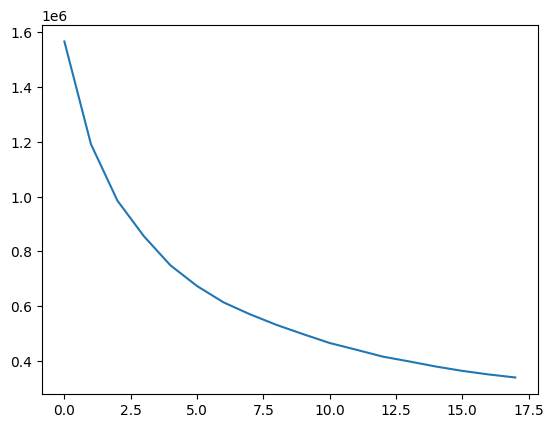

In [ ]:
distortions = []
for k in range(2,20):
    kmeans = KMeans(n_clusters=k).fit(X_train)
    distortions.append(kmeans.inertia_)
plt.plot(distortions)